## WeatherPy

In [2]:
import pandas as pd
import numpy as np
import requests
from citipy import citipy
import matplotlib.pyplot as plt

from api_keys import weather_key

## Generate Cities List

In [3]:
longtitude = np.random.uniform(low = -180, high = 180, size= 2000)
latitude = np.random.uniform(low = -90 , high = 90, size=2000)

lat_lngs = zip(latitude, longtitude)
#list(lat_lngs)

cities = []
for lat_lng in lat_lngs:
    city= citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)

750

## Perfrom API Call

In [4]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_c = 0
set_c = 1

In [5]:
print('Retrieving City Data')
print('-----------------------------------------')


url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query = '{}appid={}&units={}&q='.format(url,weather_key,units)

# For loop and create parameters
for i, city in enumerate(cities, start=1):
    try:
        response = requests.get(query+city).json()
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if index_c > 49:
            index_c = 0
            set_c += 1
        else:
            index_c += 1
            
        print('Processing Record {} of Set {}: {}'.format(index_c, set_c, city))
        
    except(KeyError, IndexError):
        print('City not found. Skipping....')
        
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Retrieving City Data
-----------------------------------------
Processing Record 1 of Set 1: jasper
Processing Record 2 of Set 1: ancud
Processing Record 3 of Set 1: carutapera
Processing Record 4 of Set 1: kirksville
Processing Record 5 of Set 1: markala
Processing Record 6 of Set 1: bathsheba
City not found. Skipping....
Processing Record 7 of Set 1: rikitea
City not found. Skipping....
Processing Record 8 of Set 1: jamestown
City not found. Skipping....
Processing Record 9 of Set 1: mocuba
Processing Record 10 of Set 1: ushuaia
Processing Record 11 of Set 1: pauini
Processing Record 12 of Set 1: tuatapere
Processing Record 13 of Set 1: san patricio
Processing Record 14 of Set 1: kenai
Processing Record 15 of Set 1: kapaa
Processing Record 16 of Set 1: norrkoping
Processing Record 17 of Set 1: pyaozerskiy
Processing Record 18 of Set 1: albany
Processing Record 19 of Set 1: tabou
Processing Record 20 of Set 1: hermanus
Processing Record 21 of Set 1: katsuura
Processing Record 22 of Se

Processing Record 33 of Set 4: daru
Processing Record 34 of Set 4: celestun
Processing Record 35 of Set 4: semnan
Processing Record 36 of Set 4: yankton
Processing Record 37 of Set 4: biu
Processing Record 38 of Set 4: tete
City not found. Skipping....
Processing Record 39 of Set 4: zhuhai
Processing Record 40 of Set 4: kattivakkam
Processing Record 41 of Set 4: ferlach
Processing Record 42 of Set 4: rochegda
Processing Record 43 of Set 4: berlevag
Processing Record 44 of Set 4: belaya gora
Processing Record 45 of Set 4: severo-kurilsk
Processing Record 46 of Set 4: honiara
Processing Record 47 of Set 4: bengkulu
Processing Record 48 of Set 4: plettenberg bay
City not found. Skipping....
Processing Record 49 of Set 4: namatanai
Processing Record 50 of Set 4: flin flon
Processing Record 0 of Set 5: nakonde
Processing Record 1 of Set 5: pineville
Processing Record 2 of Set 5: yerbogachen
Processing Record 3 of Set 5: port-gentil
Processing Record 4 of Set 5: nanjing
Processing Record 5 o

Processing Record 25 of Set 8: chegutu
Processing Record 26 of Set 8: salaverry
Processing Record 27 of Set 8: turayf
Processing Record 28 of Set 8: sao jose da coroa grande
Processing Record 29 of Set 8: lascahobas
Processing Record 30 of Set 8: shenkursk
Processing Record 31 of Set 8: chililabombwe
Processing Record 32 of Set 8: coihaique
Processing Record 33 of Set 8: palamos
Processing Record 34 of Set 8: brae
Processing Record 35 of Set 8: awbari
Processing Record 36 of Set 8: sherlovaya gora
Processing Record 37 of Set 8: kathmandu
Processing Record 38 of Set 8: sioux lookout
Processing Record 39 of Set 8: mosetse
Processing Record 40 of Set 8: zhigansk
Processing Record 41 of Set 8: saint-andre
Processing Record 42 of Set 8: hambantota
Processing Record 43 of Set 8: yar-sale
Processing Record 44 of Set 8: qasigiannguit
Processing Record 45 of Set 8: olafsvik
Processing Record 46 of Set 8: necochea
Processing Record 47 of Set 8: kijang
Processing Record 48 of Set 8: moses lake
Pr

Processing Record 19 of Set 12: tecolutla
Processing Record 20 of Set 12: coquimbo
Processing Record 21 of Set 12: shahrud
Processing Record 22 of Set 12: sale
Processing Record 23 of Set 12: sola
Processing Record 24 of Set 12: saint anthony
Processing Record 25 of Set 12: prince rupert
Processing Record 26 of Set 12: dickinson
Processing Record 27 of Set 12: komsomolskiy
Processing Record 28 of Set 12: luau
Processing Record 29 of Set 12: istanbul
Processing Record 30 of Set 12: pozhva
Processing Record 31 of Set 12: salalah
Processing Record 32 of Set 12: durban
Processing Record 33 of Set 12: lamu
Processing Record 34 of Set 12: boddam
Processing Record 35 of Set 12: riyadh
Processing Record 36 of Set 12: teresina
City not found. Skipping....
Processing Record 37 of Set 12: dahod
Processing Record 38 of Set 12: torrington
Processing Record 39 of Set 12: kumluca
Processing Record 40 of Set 12: sanandaj
City not found. Skipping....
Processing Record 41 of Set 12: irricana
City not fo

In [6]:
# Create dataframe CityWeather (cw) from list of data
cw = pd.DataFrame({
    'city': city_name, 'country':country, 'date': date,
    'max_temp': max_temp, 'cloudiness': cloudiness, 'humidity': humidity,
    'wind_speed': wind_speed, 'lat': lat, 'lng': lng
}).sort_values('city').reset_index().drop('index', axis=1)

print(cw.count())
cw.head()

city          693
country       693
date          693
max_temp      693
cloudiness    693
humidity      693
wind_speed    693
lat           693
lng           693
dtype: int64


,city,country,date,max_temp,cloudiness,humidity,wind_speed,lat,lng
0,Abalak,RU,1600396250,46.60,100,91,10.51,58.13,68.59
1,Abhā,SA,1600396133,64.40,54,22,4.99,18.22,42.51
2,Acaraú,BR,1600396128,77.45,0,84,14.09,-2.89,-40.12
3,Adrar,MR,1600396127,91.35,0,14,9.22,20.50,-10.07
4,Ahipara,NZ,1600395993,56.80,100,86,14.58,-35.17,173.17


NameError: name 'clb' is not defined

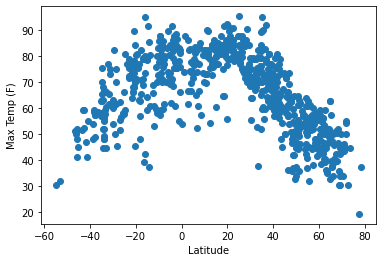

In [7]:
plt.scatter(cw['lat'],cw['max_temp'])

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
clb.set_label("Temparture Vs Latitude")
plt.show()

NameError: name 'clb' is not defined

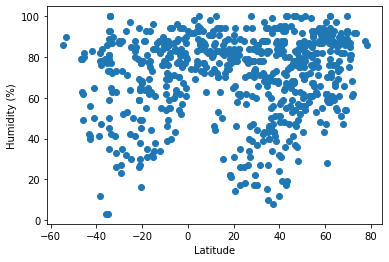

In [8]:
plt.scatter(cw['lat'],cw['humidity'])

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
clb.set_label("Humidity Vs Latitude")
plt.show()

NameError: name 'clb' is not defined

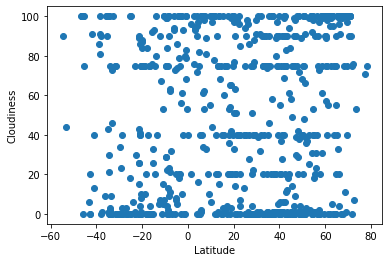

In [9]:
plt.scatter(cw['lat'],cw['cloudiness'])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
clb.set_label("Latitude Vs Cloudiness")
plt.show()

NameError: name 'clb' is not defined

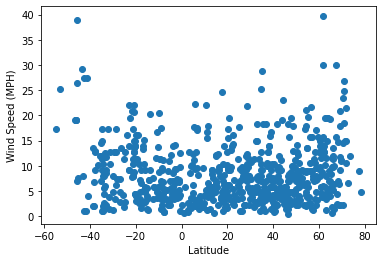

In [10]:
plt.scatter(cw['lat'],cw['wind_speed'])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
clb.set_label("Latitude Vs Wind Speed")
plt.show()

In [11]:
# Create northern and souther hemispheres
north = cw[cw.lat >= 0]
south = cw[cw.lat < 0]

In [15]:
from scipy.stats import linregress
x_values = cw['lat']
y_values = cw['max_temp']


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

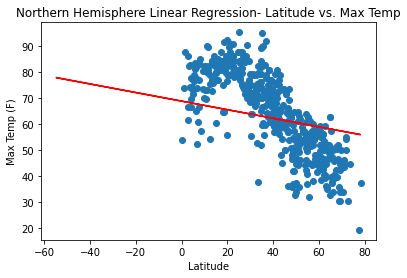

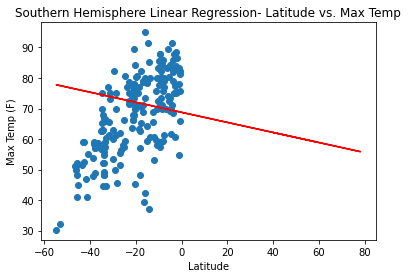

In [26]:
plt.scatter(north.lat, north.max_temp)

plt.plot(x_values, regression_values, "red")


plt.title('Northern Hemisphere Linear Regression- Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()



#------------------------------------------

plt.scatter(south.lat, south.max_temp)

plt.plot(x_values, regression_values, "red")

plt.title('Southern Hemisphere Linear Regression- Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

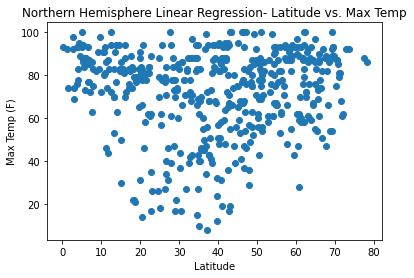

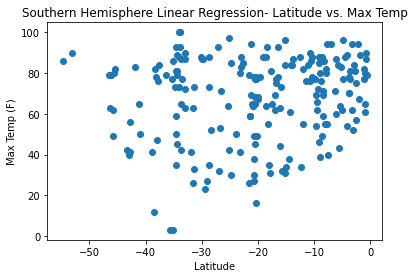

In [18]:
plt.scatter(north.lat, north.humidity)

plt.title('Northern Hemisphere Linear Regression- Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

#------------------------------------------

plt.scatter(south.lat, south.humidity)

plt.title('Southern Hemisphere Linear Regression- Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

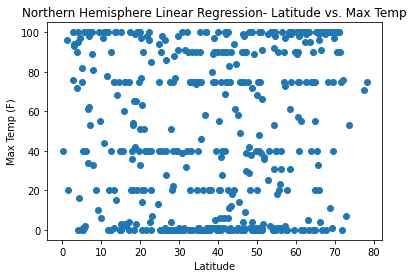

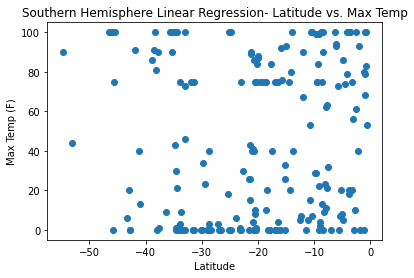

In [19]:
plt.scatter(north.lat, north.cloudiness)

plt.title('Northern Hemisphere Linear Regression- Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

#------------------------------------------

plt.scatter(south.lat, south.cloudiness)

plt.title('Southern Hemisphere Linear Regression- Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

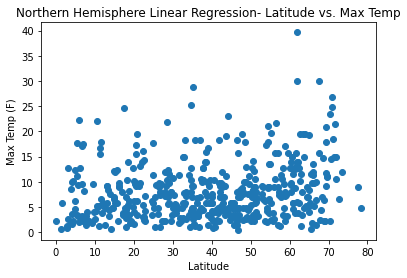

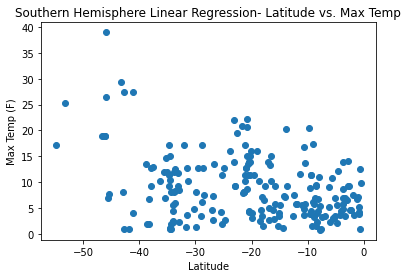

In [21]:
plt.scatter(north.lat, north.wind_speed)

plt.title('Northern Hemisphere Linear Regression- Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

#------------------------------------------

plt.scatter(south.lat, south.wind_speed)

plt.title('Southern Hemisphere Linear Regression- Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

In [30]:
cw.to_csv("weatherpy.csv", encoding="utf-8", index=False)
